<a href="https://colab.research.google.com/github/shirsneh/Statistical-Analysis/blob/main/Linear%20%26%20Logistic%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear & Logistic regression**

## **Setting the environment**

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Q1**

In [2]:
file_path = '/content/drive/MyDrive/HW2/students_grades.csv'
# Read from the file
students_grades = pd.read_csv(file_path)
print(students_grades.head())
print(students_grades.describe())
print(students_grades.info())



  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
              age        Medu        Fedu  traveltime   studytime    failures  \
count  

### **Q1.1**

G3 - student success course ending

Medu - Mother education

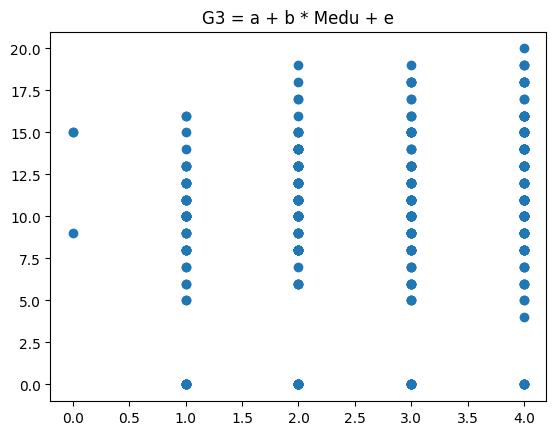

In [3]:
# Scatter plot and Check linearity
plt.scatter(students_grades['Medu'], students_grades['G3'])
plt.title("G3 = a + b * Medu + e")
plt.show()

In [4]:
merged = students_grades
for col in ['Medu']:
  dummies = pd.get_dummies(students_grades[col])
  # Concatenate the dummies to original dataframe
  merged = pd.concat([merged, dummies], axis='columns')
  merged = merged.drop(['Medu',4], axis='columns')
print(merged)

    school sex  age address famsize Pstatus  Fedu      Mjob      Fjob  reason  \
0       GP   F   18       U     GT3       A     4   at_home   teacher  course   
1       GP   F   17       U     GT3       T     1   at_home     other  course   
2       GP   F   15       U     LE3       T     1   at_home     other   other   
3       GP   F   15       U     GT3       T     2    health  services    home   
4       GP   F   16       U     GT3       T     3     other     other    home   
..     ...  ..  ...     ...     ...     ...   ...       ...       ...     ...   
390     MS   M   20       U     LE3       A     2  services  services  course   
391     MS   M   17       U     LE3       T     1  services  services  course   
392     MS   M   21       R     GT3       T     1     other     other  course   
393     MS   M   18       R     LE3       T     2  services     other  course   
394     MS   M   19       U     LE3       T     1     other   at_home  course   

     ... Walc  health  abse

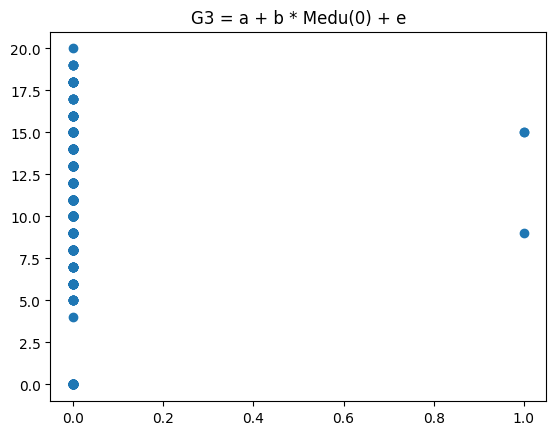

In [5]:
plt.scatter(merged[0], merged['G3'])
plt.title("G3 = a + b * Medu(0) + e")
plt.show()

In [6]:
reg = sm.formula.ols(formula='G3 ~ Medu', data=students_grades).fit()
print(reg.summary())
print(reg.rsquared_adj)
print(reg.f_pvalue)

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     19.45
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           1.34e-05
Time:                        21:47:03   Log-Likelihood:                -1151.6
No. Observations:                 395   AIC:                             2307.
Df Residuals:                     393   BIC:                             2315.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.9167      0.610     12.984      0.0

### **Q1.2**

Fedu - Father education

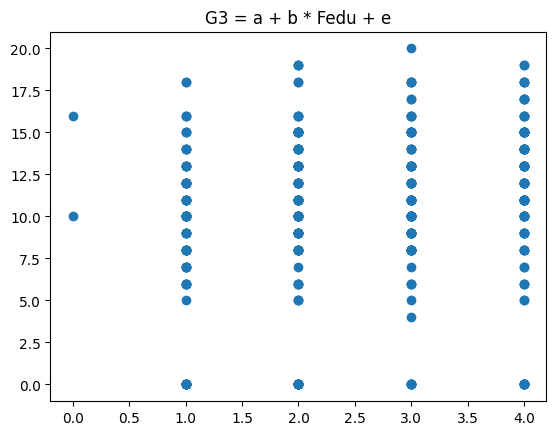

In [7]:
plt.scatter(students_grades['Fedu'], students_grades['G3'])
plt.title("G3 = a + b * Fedu + e")
plt.show()

In [8]:
reg = sm.formula.ols(formula='G3 ~ Fedu', data=students_grades).fit()
print(reg.summary())
print(reg.rsquared_adj)
print(reg.f_pvalue)

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     9.352
Date:                Wed, 19 Mar 2025   Prob (F-statistic):            0.00238
Time:                        21:47:03   Log-Likelihood:                -1156.5
No. Observations:                 395   AIC:                             2317.
Df Residuals:                     393   BIC:                             2325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.7967      0.576     15.264      0.0

### **Q1.3**

In [9]:
reg = sm.formula.ols(formula='G3 ~ Medu + Fedu', data=students_grades).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     9.802
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           7.01e-05
Time:                        21:47:03   Log-Likelihood:                -1151.5
No. Observations:                 395   AIC:                             2309.
Df Residuals:                     392   BIC:                             2321.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.8205      0.648     12.073      0.0

### **Q1.4**

In [10]:
reg = sm.formula.ols(formula='G3 ~ C(Medu)', data=students_grades).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     6.088
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           9.24e-05
Time:                        21:47:03   Log-Likelihood:                -1149.2
No. Observations:                 395   AIC:                             2308.
Df Residuals:                     390   BIC:                             2328.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0000      2.579      5.040   

### **Q1 section 3**

In [11]:
reg = sm.formula.ols(formula='G3 ~ Walc + sex * Walc', data=students_grades).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     5.496
Date:                Wed, 19 Mar 2025   Prob (F-statistic):            0.00105
Time:                        21:47:03   Log-Likelihood:                -1153.0
No. Observations:                 395   AIC:                             2314.
Df Residuals:                     391   BIC:                             2330.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         9.1798      0.659     13.926

## **Q2**

In [12]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
from math import sqrt

students_grades['Improvement'] = (students_grades['G2'] > students_grades['G1']).astype(int)
print(students_grades.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  freetime goout  Dalc  Walc  health absences  G1  G2  G3 Improvement  
0        3     4     1     1       3        6   5   6   6           1  
1        3     3     1     1       3        4   5   5   6           0  
2        3     2     2     3       3       10   7   8  10           1  
3        2     2     1     1       5        2  15  14  15           0  
4        3     2     1     2       5        4   6  10  10           1  

[5 rows x 34 columns]


In [13]:
selected_cols = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet','romantic']
X_data = pd.get_dummies(students_grades[selected_cols],  columns=['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet','romantic'], drop_first=True)
X_data = X_data.astype(float)
y_data = students_grades['Improvement']

X_data = sm.add_constant(X_data)
log_reg = sm.Logit(y_data, X_data).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.614168
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            Improvement   No. Observations:                  395
Model:                          Logit   Df Residuals:                      386
Method:                           MLE   Df Model:                            8
Date:                Wed, 19 Mar 2025   Pseudo R-squ.:                 0.02495
Time:                        21:47:04   Log-Likelihood:                -242.60
converged:                       True   LL-Null:                       -248.80
Covariance Type:            nonrobust   LLR p-value:                    0.1336
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.2328      0.626     -1.969      0.049      -2.460      -0.006
schoolsup_yes    

In [14]:
train_file_path = '/content/drive/MyDrive/HW2/students_grades_train.csv'
test_file_path = '/content/drive/MyDrive/HW2/students_grades_test.csv'
students_grades_train = pd.read_csv(train_file_path)
students_grades_test = pd.read_csv(test_file_path)
students_grades_train['Improvement'] = (students_grades_train['G2'] > students_grades_train['G1']).astype(int)
print(students_grades_train.head())
print(students_grades_test.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  freetime goout  Dalc  Walc  health absences  G1  G2  G3 Improvement  
0        3     4     1     1       3        6   5   6   6           1  
1        3     3     1     1       3        4   5   5   6           0  
2        3     2     2     3       3       10   7   8  10           1  
3        2     2     1     1       5        2  15  14  15           0  
4        3     2     1     2       5        4   6  10  10           1  

[5 rows x 34 columns]
  school sex  age address famsize Pstatus  Medu  Fedu     

In [15]:
train_selected_cols = ['age', 'studytime', 'failures', 'schoolsup', 'activities', 'absences']
train_X_data = pd.get_dummies(students_grades_train[train_selected_cols],  columns=['schoolsup', 'activities'], drop_first=True)
train_X_data = train_X_data.astype(float)
train_y_data = students_grades_train['Improvement']

train_X_data = sm.add_constant(train_X_data)
train_log_reg = sm.Logit(train_y_data, train_X_data).fit()
print(train_log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.633129
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            Improvement   No. Observations:                  298
Model:                          Logit   Df Residuals:                      291
Method:                           MLE   Df Model:                            6
Date:                Wed, 19 Mar 2025   Pseudo R-squ.:                 0.03851
Time:                        21:47:05   Log-Likelihood:                -188.67
converged:                       True   LL-Null:                       -196.23
Covariance Type:            nonrobust   LLR p-value:                   0.01938
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.6091      2.071      2.708      0.007       1.549       9.669
age              

### **Q2.4**

In [16]:
test_X_data = pd.get_dummies(students_grades_test[train_selected_cols],  columns=['schoolsup', 'activities'], drop_first=True)
test_X_data = sm.add_constant(test_X_data)
test_X_data = test_X_data.astype(float)
students_grades_test['Improvement'] = (students_grades_test['G2'] > students_grades_test['G1']).astype(int)
test_y_data = students_grades_test['Improvement']
predictions_test = train_log_reg.predict(test_X_data)
print(predictions_test)
print(test_X_data)

0     0.241636
1     0.250855
2     0.209627
3     0.347831
4     0.325331
        ...   
92    0.134129
93    0.334145
94    0.124395
95    0.270410
96    0.188771
Length: 97, dtype: float64
    const   age  studytime  failures  absences  schoolsup_yes  activities_yes
0     1.0  18.0        4.0       0.0       0.0            0.0             0.0
1     1.0  18.0        1.0       0.0       5.0            0.0             0.0
2     1.0  18.0        2.0       0.0      14.0            0.0             0.0
3     1.0  17.0        1.0       0.0       0.0            0.0             0.0
4     1.0  17.0        3.0       0.0       0.0            0.0             0.0
..    ...   ...        ...       ...       ...            ...             ...
92    1.0  20.0        2.0       2.0      11.0            0.0             0.0
93    1.0  17.0        1.0       0.0       3.0            0.0             0.0
94    1.0  21.0        1.0       3.0       3.0            0.0             0.0
95    1.0  18.0        1.0  

In [17]:
boolean_predictions = []
for pred in predictions_test:
  if pred >= 0.5:
    boolean_predictions.append(1)
  else:
      boolean_predictions.append(0)
print(boolean_predictions, predictions_test)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0     0.241636
1     0.250855
2     0.209627
3     0.347831
4     0.325331
        ...   
92    0.134129
93    0.334145
94    0.124395
95    0.270410
96    0.188771
Length: 97, dtype: float64


In [18]:
MAE = mean_absolute_error(test_y_data, predictions_test)
MSE = mean_squared_error(test_y_data, predictions_test)
RMSE = sqrt(MSE)
print("MAE: {}, MSE: {}, RMSE: {}".format(MAE, MSE, RMSE))

MAE: 0.33198011075051315, MSE: 0.1540594773671942, RMSE: 0.39250411127425683


In [19]:
from sklearn.metrics import confusion_matrix

confuse_mat = confusion_matrix(test_y_data, boolean_predictions)
print(confuse_mat)

[[79  0]
 [18  0]]


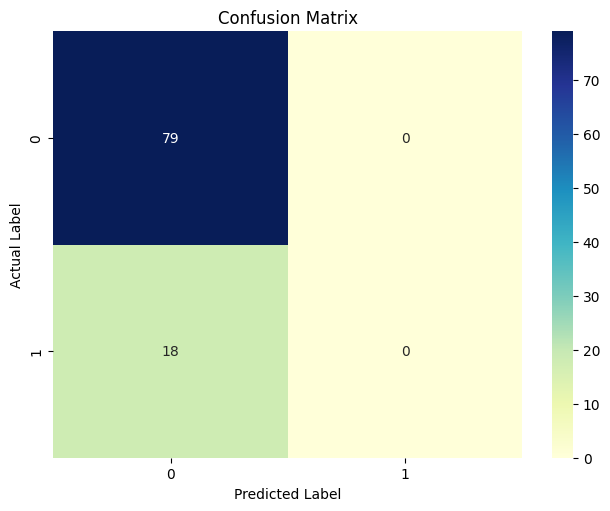

Accuracy: 0.8144329896907216
Recall: 0.0
Precision: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

sns.heatmap(pd.DataFrame(confuse_mat), annot=True, cmap="YlGnBu")
plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()
print("Accuracy:", accuracy_score(test_y_data, boolean_predictions))
print("Recall:", recall_score(test_y_data, boolean_predictions))
print("Precision:", precision_score(test_y_data, boolean_predictions))